# Powergrid library construction

In [2]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import warnings
pd.set_option('display.float_format', '{:0.8f}'.format)
import operator

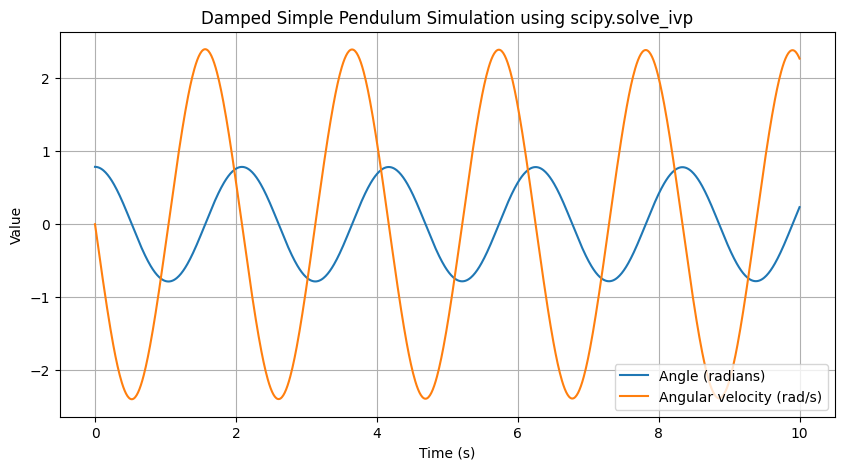

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Function to compute derivatives
def pendulum_rhs(t, y, gamma, L=1):
    """
    Function to compute derivatives for simple pendulum with damping
    
    Parameters:
        t : float
            Time
        y : array_like
            Vector containing [theta, omega], where
            theta is the angle and omega is the angular velocity
        gamma : float
            Damping coefficient
        L : float
            Length of the pendulum
        
    Returns:
        dydt : array_like
            Vector containing [omega, alpha], where
            omega is the angular velocity and alpha is the angular acceleration
    """
    theta, omega = y
    alpha = - (9.81 / L) * np.sin(theta) - gamma * omega
    return [omega, alpha]

# Parameters
theta0 = np.pi / 4  # Initial angle (radians)
omega0 = 0.0        # Initial angular velocity (radians per second)
gamma = 0.0       # Damping coefficient
L = 1.0             # Length of the pendulum (meters)
t_span = (0, 10)    # Time span for the simulation

# Function to integrate the system of ODEs
def integrate_pendulum(t_span, y0, gamma, L):

    sol = solve_ivp(lambda t, y: pendulum_rhs(t, y, gamma, L), t_span, y0, method='RK45', t_eval=np.linspace(*t_span, 1000))
    return sol

# Integrate the pendulum system
sol = integrate_pendulum(t_span, [theta0, omega0], gamma, L)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label='Angle (radians)')
plt.plot(sol.t, sol.y[1], label='Angular velocity (rad/s)')
plt.title('Damped Simple Pendulum Simulation using scipy.solve_ivp')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
IC_df = pd.read_csv("parameters/init_cond_simp_pend.csv")

In [5]:
IC_df = IC_df[0:2]
IC_df

,x,u,theta,omega
0,0,0,2.35619449,0.80000000
1,-1,0,2.35619449,-0.80000000


In [6]:
# Mechanical eEnergy level
0.5*(IC_df["omega"])**2 + 9.81*(1-np.cos(IC_df["theta"]))

0   17.06671752
1   17.06671752
dtype: float64

In [7]:
params_df = pd.read_csv("parameters/pend_param.csv")
params_df


,l,m_c,m_p
0,1,1,1


In [8]:
g = 9.81   # Acceleration due to gravity (m/s^2)


### Synthesizing data from different ICs

### Synthesizing data from different ICs

In [9]:
L = 5.0
# y_shift = 0.9 * L
# y_shift = 0

num_time_points = 20
# Time span
t_span = (0.0, 10)  # from 0 to 10 seconds
#Valuation points
t_eval_ = np.linspace(t_span[0], t_span[1], num_time_points)
data_matrix_df_list = []


for param_index in params_df.index:
    params = params_df.loc[param_index]
    # Define parameters
    m_c = params['m_c']  # Mass of the cart (kg)
    m_p = params['m_p']  # Mass of the pendulum (kg)
    l = params['l']    # Length of the pendulum (m)
    for IC_index in IC_df.index:
        IC = IC_df.loc[IC_index]
        y0 = IC.values
                # Parameters
        theta0 = IC["theta"]  # Initial angle (radians)
        omega0 = IC["omega"]        # Initial angular velocity (radians per second)
        gamma = 0.0         # Damping coefficient
        # Solve the ODEs
        sol = solve_ivp(lambda t, y: pendulum_rhs(t, y, gamma, L), t_span, [theta0, omega0], method='RK45', t_eval=t_eval_)
        sol_df = pd.DataFrame(sol.y.T, columns=["theta", "omega"])
        sol_df["x"] = L*np.sin(sol_df["theta"])
        sol_df["y"] = -L*np.cos(sol_df["theta"])
        sol_df["t"] = t_eval_
        data_matrix_df_list.append(sol_df[["t", "x", "y"]])
        # if IC_index == 0:
        #     # Plot the results
        #     plt.figure(figsize=(10, 6))
        #     plt.plot(sol.t, sol.y[0], label='Cart Position (x)')
        #     plt.plot(sol.t, sol.y[2], label='Pendulum Angle (theta)')
        #     plt.xlabel('Time (s)')
        #     plt.ylabel('Position (m) / Angle (rad)')
        #     plt.title('Upright Pendulum on Moving Cart')
        #     plt.legend()
        #     plt.grid(True)
        #     plt.show()

data_matrix_df = pd.concat(data_matrix_df_list, ignore_index=True)
data_matrix_df

,t,x,y
0,0.00000000,3.53553391,3.53553391
1,0.52631579,2.54220830,4.30548220
2,1.05263158,2.69490540,4.21158935
3,1.57894737,3.94120784,3.07682967
4,2.10526316,4.97266055,-0.52215614
5,2.63157895,1.01943572,-4.89497199
6,3.15789474,-4.56138390,-2.04787132
7,3.68421053,-4.39740659,2.37966705
8,4.21052632,-2.93370565,4.04887283
9,4.73684211,-2.43260865,4.36834238


In [10]:
from dae_finder import add_noise_to_df
noise_perc = 10


data_matrix_features = data_matrix_df_list[0].columns
for ind, data_matrix_ in enumerate(data_matrix_df_list):
    t_exact = data_matrix_["t"]
    noisy_data_df = add_noise_to_df(data_matrix_, noise_perc=noise_perc, random_seed=111)
    noisy_data_df["t"] = t_exact
    data_matrix_df_list[ind] = noisy_data_df

In [11]:
from scipy import interpolate

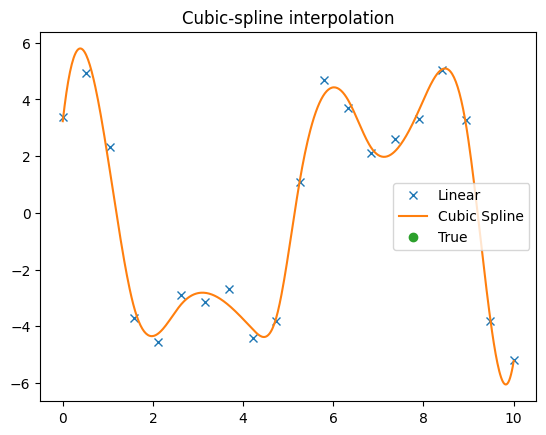

In [12]:
#smoothing parameter: when equal weightage: num_data_points * std of data
s_param = num_time_points * (0.01*noise_perc*data_matrix_df_list[1].std()["x"])**2

tck = interpolate.splrep(data_matrix_df_list[1]["t"], data_matrix_df_list[1]["x"], s=s_param)
t_eval_new = np.linspace(t_span[0], t_span[1], 500)
x_new = interpolate.splev(t_eval_new, tck, der=0)

plt.figure()
plt.plot(data_matrix_df_list[1]["t"], data_matrix_df_list[1]["x"], "x", t_eval_new, x_new,
        data_matrix_df[50:100]["t"], data_matrix_df[50:100]["x"], "o")
plt.legend(['Linear', 'Cubic Spline', 'True'])
# plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

In [13]:
(3/4)*np.pi

2.356194490192345

<Axes: >

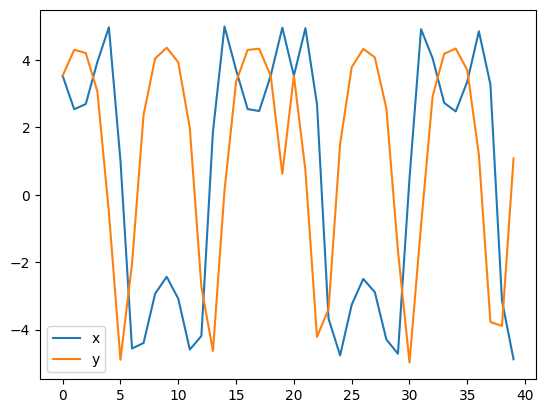

In [14]:
data_matrix_df[["x","y"]].plot()

### Smoothing data and finding derivatives

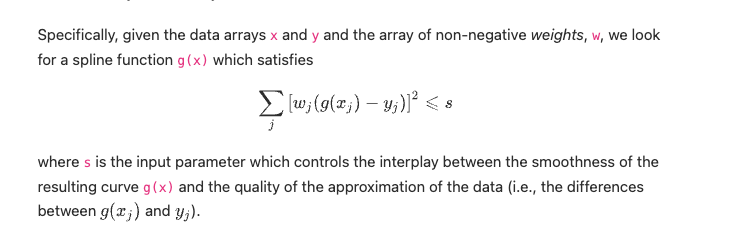

from dae_finder import der_matrix_calculator

from scipy import interpolate

def der_label(feature, der=1):
    if der==0:
        return feature
    elif der==1:
        return "d({}) /dt".format(feature)
    else:
        return "d^{}({}) /dt^{}".format(der, feature, der)

def smooth_data(data_matrix, domain_var = "t", s_param=None, noise_perc=0, derr_order = 1, eval_points = []):
    assert domain_var in data_matrix, "domain variable not found in the data matrix"

    data_t = data_matrix[domain_var]
    num_time_points = len(data_matrix)
    find_s_param = !s_param and s_param !=0

    if len(eval_points)==0:
        eval_points = np.linspace(data_t.iloc[0], data_t.iloc[-1], 10*num_time_points)
    t_eval_new = eval_points
               
    data_matrix_ = data_matrix.drop(domain_var, axis=1)
    data_matrix_std = data_matrix_.std()

    data_matrix_smooth = pd.DataFrame(t_eval_new, columns=[domain_var])
    for feature in data_matrix_:
        if find_s_param:
            #smoothing parameter: when equal weightage: num_data_points * std of data
            s_param = num_time_points * (0.01*noise_perc*data_matrix_std[feature])**2
        tck = interpolate.splrep(data_t, data_matrix_[feature], s=s_param)
        for der_ind in range(derr_order+1):
            smoothed_data = interpolate.splev(t_eval_new, tck, der=der_ind)
            data_matrix_smooth[der_label(feature, der_ind)] = smoothed_data

    return data_matrix_smooth
    



t_eval_new = np.linspace(data_matrix_df_list[1]["t"].iloc[0], data_matrix_df_list[1]["t"].iloc[-1], num_smoothed_points)

smooth_data(data_matrix_df_list[1],derr_order=1, eval_points=t_eval_new, noise_perc=noise_perc) - data_matrix_smooth_df_list[1]

delta_t = t_eval_[1]- t_eval_[0]
data_matrix_features = data_matrix_df_list[0].columns
num_smoothed_points = num_time_points*10
data_matrix_smooth_df_list = []

for ind, data_matrix in enumerate(data_matrix_df_list):
    data_t = data_matrix["t"]
    num_time_points = len(data_matrix)
    data_matrix_ = data_matrix.drop(["t"], axis=1)
    data_matrix_std = data_matrix_.std()
    # print(data_matrix_std)
    t_eval_new = np.linspace(data_t.iloc[0], data_t.iloc[-1], num_smoothed_points)
    data_matrix_smooth = pd.DataFrame(t_eval_new, columns=["t"])
    for feature in data_matrix_:
        #smoothing parameter: when equal weightage: num_data_points * std of data
        s_param = num_time_points * (0.01*noise_perc*data_matrix_std[feature])**2
        # print(s_param)
        # s_param = 0
        
        tck = interpolate.splrep(data_t, data_matrix_[feature], s=s_param)
        smoothed_data = interpolate.splev(t_eval_new, tck, der=0)
        smoothed_derr = interpolate.splev(t_eval_new, tck, der=1)
        data_matrix_smooth[feature] = smoothed_data
        data_matrix_smooth["d({}) /dt".format(feature)] = smoothed_derr

    data_matrix_smooth_df_list.append(data_matrix_smooth)

    
    # derr_matrix = der_matrix_calculator(data_matrix_, delta_t)
    # data_matrix_df_list[ind] = pd.concat([data_matrix_.iloc[:-1], derr_matrix], axis=1)

data_matrix_df_smooth_appended = pd.concat(data_matrix_smooth_df_list[:-1], ignore_index=True)

In [15]:
from dae_finder import smooth_data

num_smoothed_points = num_time_points*10

t_eval_new = np.linspace(data_matrix_df_list[0]["t"].iloc[0], data_matrix_df_list[0]["t"].iloc[-1], num_smoothed_points)

#Calling the smoothening function
data_matrix_smooth_df_list = [smooth_data(data_matrix,derr_order=1, noise_perc=noise_perc, eval_points=t_eval_new) for data_matrix in data_matrix_df_list]

data_matrix_df_smooth_appended = pd.concat(data_matrix_smooth_df_list[:-1], ignore_index=True)

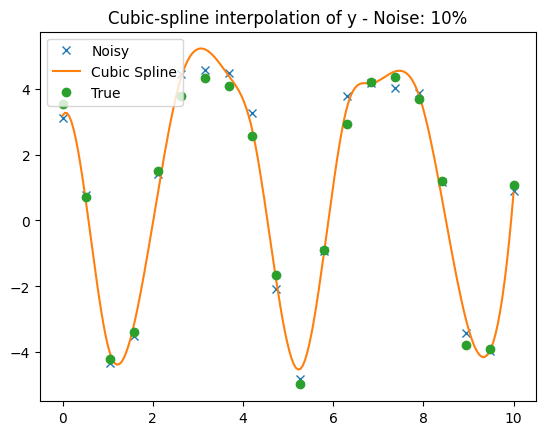

In [16]:
ind = 1
feature_ = "y"

plt.figure()
# plt.plot(data_matrix_df_list[1]["t"], data_matrix_df_list[1]["x"], "x", t_eval_new, x_new,
#         data_matrix_df[50:100]["t"], data_matrix_df[50:100]["x"], "o")

plt.plot(data_matrix_df_list[ind]["t"], data_matrix_df_list[ind][feature_], "x", data_matrix_smooth_df_list[ind]["t"],
         data_matrix_smooth_df_list[ind][feature_],data_matrix_df[ind*num_time_points:(ind+1)*num_time_points]["t"], data_matrix_df[ind*num_time_points:(ind+1)*num_time_points][feature_], "o")
plt.legend(['Noisy', 'Cubic Spline', 'True'])
# plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation of {} - Noise: {}%'.format(feature_, noise_perc))
plt.show()

<Axes: >

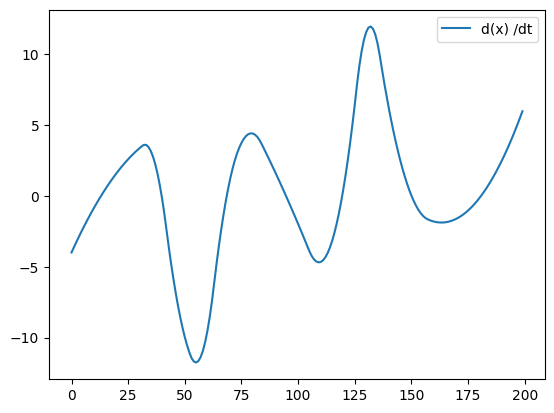

In [17]:
data_matrix_smooth_df_list[0][["d(x) /dt"]].plot()

<Axes: >

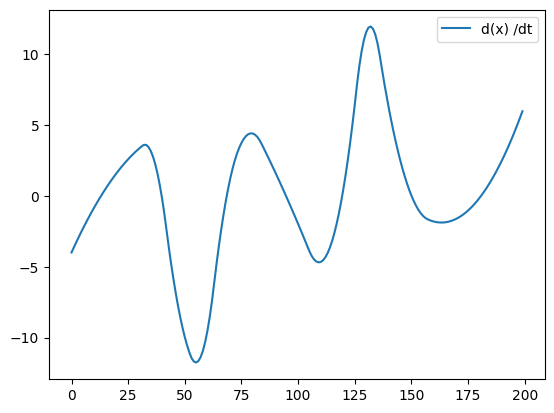

In [18]:
data_matrix_smooth_df_list[0][["d(x) /dt"]].plot()

#Taking second derivatives
delta_t = t_eval_[1]- t_eval_[0]
data_matrix_features = data_matrix_df_list[0].columns
for ind, data_matrix_ in enumerate(data_matrix_df_list):
    derr_matrix = der_matrix_calculator(data_matrix_, delta_t)
    data_matrix_df_list[ind] = pd.concat([data_matrix_.iloc[:-1], derr_matrix], axis=1)

data_matrix_df_appended = pd.concat(data_matrix_df_list, ignore_index=True)
data_matrix_df_appended

In [19]:
# data_matrix_df = data_matrix_df_appended[["x","y"]]
# data_matrix_df = pd.concat([data_matrix_df, data_matrix_df_appended[["d(u) /dt"]]], axis=1)
data_matrix_df_smooth = data_matrix_df_smooth_appended[["x","y", "d(x) /dt", "d(y) /dt"]]
data_matrix_df_smooth

,x,y,d(x) /dt,d(y) /dt
0,3.46098409,3.22915527,-3.99697038,0.30913590
1,3.26892853,3.25267057,-3.64803638,0.62112712
2,3.09422712,3.29101269,-3.30627508,0.89924341
3,2.93651943,3.34247937,-2.97168650,1.14348478
4,2.79544501,3.40536837,-2.64427064,1.35385124
...,...,...,...,...
195,3.73416867,1.99460240,4.29666486,-6.49601854
196,3.95997696,1.65264878,4.69255160,-7.11911961
197,4.20598759,1.27857188,5.10071792,-7.77452504
198,4.47281761,0.87074837,5.52116381,-8.46223481


<Axes: >

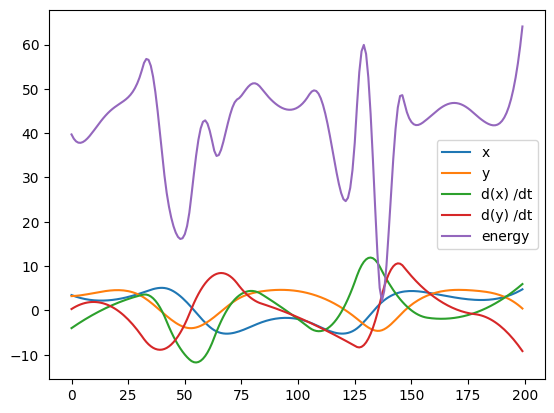

In [20]:
from copy import deepcopy
new_df = deepcopy(data_matrix_df_smooth)

new_df["energy"] = 0.5*((new_df["d(x) /dt"])**2 + (new_df["d(y) /dt"])**2) +  9.81*new_df["y"]

new_df.plot()

## Forming candiate library

In [42]:
from sklearn.preprocessing import FunctionTransformer
from copy import deepcopy

def sin_transformer(period = 2*np.pi):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def sin_diff_transformer(period = 2*np.pi):
    return FunctionTransformer(lambda x,y: np.sin((x-y) / period * 2 * np.pi))

def cos_transformer(period = 2*np.pi):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))


data_matrix_df_with_trig = deepcopy(data_matrix_df)
# data_matrix_df_with_trig["sin(theta)"] = sin_transformer(1).fit_transform(data_matrix_df_with_trig)["theta"]
# data_matrix_df_with_trig["cos(theta)"] = cos_transformer(1).fit_transform(data_matrix_df_with_trig)["theta"]

In [142]:
from scipy.sparse import coo_array

row  = np.array([0, 3, 1, 0, 0, 0])
col  = np.array([0, 3, 1, 1, 2, 4])
data = np.array([4, 5, 7, 9, 100, 101])
# sp_array = coo_array((data, (row, col)), shape=(4, 4))
sp_array = coo_array((data, (row, col)))


In [83]:
list(zip(sp_array.row, sp_array.col))

[(0, 0), (3, 3), (1, 1), (0, 1), (0, 2), (0, 4)]

array([0, 3, 1, 2])

In [144]:
sp_array.col

array([0, 3, 1, 1, 2, 4])

In [118]:
sp_array.toarray()[0]

array([  4,   9, 100,   0, 101])

In [ ]:
sp_ar

In [147]:
new_sp = sp_array.tocsr()

In [148]:
new_sp.toarray()

array([[  4,   9, 100,   0, 101],
       [  0,   7,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   5,   0]])

In [152]:
col_sp = new_sp[[0]]
col_sp.col

AttributeError: 'csr_array' object has no attribute 'col'

In [172]:
#Getting rows corresponding to 1 and 2
new_sp[[0, 1,2]]

<3x5 sparse array of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [165]:
#Getting rows corresponding to 0 and 1
new_sp[:, [0,1]]

<4x2 sparse array of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [173]:
#Getting rows corresponding to 1 and 2
new_sp[[0, 1,2]].toarray()

array([[  4,   9, 100,   0, 101],
       [  0,   7,   0,   0,   0],
       [  0,   0,   0,   0,   0]])

In [167]:
#Getting rows corresponding to 0 and 1
new_sp[:, [0,1]].toarray()

array([[4, 9],
       [0, 7],
       [0, 0],
       [0, 0]])

In [175]:
#Getting rows corresponding to 1 and 2
new_sp[[0, 1,2]].tocoo().row
# new_sp[[1,2]].tocoo().col


array([0, 0, 0, 0, 1])

In [177]:
new_sp[[0, 1,2]].tocoo().col


array([0, 1, 2, 4, 1])

In [167]:
#Getting rows corresponding to 0 and 1
new_sp[:, [0,1]].toarray()

array([[4, 9],
       [0, 7],
       [0, 0],
       [0, 0]])

In [ ]:
new_sp[[1,2]]

In [161]:
new_sp.getrow(1)

/var/folders/1h/sr7kc8_d5pddvym2zw5gv28r0000gn/T/ipykernel_1863/967115161.py:1: DeprecationWarning: `getrow` is deprecated and will be removed in v1.13.0; use `X[[1]]` instead.
  new_sp.getrow(1)


<1x5 sparse array of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [164]:
new_sp.getcol(1)

/var/folders/1h/sr7kc8_d5pddvym2zw5gv28r0000gn/T/ipykernel_1863/3671770664.py:1: DeprecationWarning: `getcol` is deprecated and will be removed in v1.13.0; use `X[:, [1]]` instead.
  new_sp.getcol(1)


<4x1 sparse array of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [48]:
np.sin(data_matrix_df_with_trig) - sin_trans_obj.fit_transform(data_matrix_df_with_trig)

,t,x,y
0,0.00000000,0.00000000,0.00000000
1,0.00000000,0.00000000,0.00000000
2,0.00000000,0.00000000,0.00000000
3,0.00000000,0.00000000,0.00000000
4,0.00000000,0.00000000,0.00000000
5,0.00000000,0.00000000,0.00000000
6,0.00000000,0.00000000,0.00000000
7,0.00000000,0.00000000,0.00000000
8,0.00000000,0.00000000,0.00000000
9,0.00000000,0.00000000,0.00000000


In [47]:
sin_trans_obj = sin_transformer()
sin_trans_obj.fit_transform(data_matrix_df_with_trig)

,t,x,y
0,0.00000000,-0.38383075,-0.38383075
1,0.50235115,0.56413425,-0.91834942
2,0.86872962,0.43198020,-0.87719892
3,0.99996678,-0.71708793,0.06471773
4,0.86054034,-0.96632013,-0.49875012
5,0.48818921,0.85181256,0.98337798
6,-0.01630136,0.98862038,-0.88834184
7,-0.51637960,0.95080183,0.69031591
8,-0.87668803,-0.20639286,-0.78783154
9,-0.99970104,-0.65106294,-0.94139746


10.0

In [21]:
from dae_finder import PolyFeatureMatrix

poly_feature_ob = PolyFeatureMatrix(2)

candidate_lib_full = poly_feature_ob.fit_transform(data_matrix_df_smooth)

In [22]:
candidate_lib_full = candidate_lib_full.drop(["1"], axis=1)
candidate_lib_full

,x,y,d(x) /dt,d(y) /dt,x^2,x y,x d(x) /dt,x d(y) /dt,y^2,y d(x) /dt,y d(y) /dt,d(x) /dt^2,d(x) /dt d(y) /dt,d(y) /dt^2
0,3.46098409,3.22915527,-3.99697038,0.30913590,11.97841085,11.17605502,-13.83345090,1.06991443,10.42744378,-12.90683800,0.99824782,15.97577225,-1.23560703,0.09556500
1,3.26892853,3.25267057,-3.64803638,0.62112712,10.68589372,10.63274762,-11.92517018,2.03042015,10.57986585,-11.86586056,2.02032189,13.30816940,-2.26589431,0.38579889
2,3.09422712,3.29101269,-3.30627508,0.89924341,9.57424147,10.18314072,-10.23036602,2.78246335,10.83076453,-10.88099325,2.95942148,10.93145492,-2.97314608,0.80863871
3,2.93651943,3.34247937,-2.97168650,1.14348478,8.62314635,9.81525562,-8.72641515,3.35786529,11.17216837,-9.93280084,3.82207431,8.83092066,-3.39807830,1.30755745
4,2.79544501,3.40536837,-2.64427064,1.35385124,7.81451283,9.51952002,-7.39191316,3.78461669,11.59653371,-9.00471557,4.61036217,6.99216719,-3.57994907,1.83291317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.73416867,1.99460240,4.29666486,-6.49601854,13.94401566,7.44818180,16.04447131,-24.25722890,3.97843875,8.57013805,-12.95697418,18.46132891,-27.91121456,42.19825681
196,3.95997696,1.65264878,4.69255160,-7.11911961,15.68141752,6.54445110,18.58239622,-28.19154963,2.73124800,7.75513969,-11.76540436,22.02004053,-33.40683613,50.68186405
197,4.20598759,1.27857188,5.10071792,-7.77452504,17.69033157,5.37765747,21.45355624,-32.69955578,1.63474606,6.52163451,-9.94028912,26.01732329,-39.65565916,60.44323953
198,4.47281761,0.87074837,5.52116381,-8.46223481,20.00609741,3.89469865,24.69515874,-37.85003290,0.75820273,4.80754439,-7.36847717,30.48324983,-46.72138458,71.60941793


candid_lib_comb = pd.concat([candidate_lib_full, data_matrix_df_with_trig[["cos(theta)", "sin(theta)"]]], axis=1)
candid_lib_comb

### SVD analysis

In [23]:
from sklearn import decomposition
pca_1 = decomposition.PCA()
pca_1.fit(candidate_lib_full)

# pca_2 = decomposition.PCA()
# pca_2.fit(mean_candidate_lib)

# pca_3 = decomposition.PCA()
# pca_3.fit(selected_data_matrix_df)

pca_2 = decomposition.PCA()
pca_2.fit(candidate_lib_full.drop(["x^2", "x d(x) /dt"],axis=1))

pca_3 = decomposition.PCA()
pca_3.fit(candidate_lib_full.drop(["x^2", "x d(x) /dt", "y"],axis=1))


# singular_values = pca_1.singular_values_
# mean_singular_values = pca_2.singular_values_

var_expl_ratio = pca_1.explained_variance_ratio_
theta_dot_sq_rem_expl_ratio = pca_2.explained_variance_ratio_
theta_dot_rem_expl_ratio = pca_3.explained_variance_ratio_
# data_var_expl_ratio_E = pca_4.explained_variance_

# var_expl_ratio_E_rem = pca_5.explained_variance_


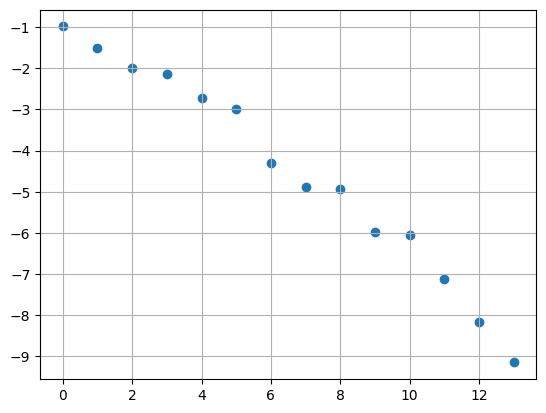

In [24]:
from matplotlib import pyplot as plt

plt.scatter(np.arange(len(var_expl_ratio)),np.log(var_expl_ratio))
plt.grid()
# for x, y in zip(np.arange(len(candid_lib_sing_values)),np.log(candid_lib_sing_values)):
#     plt.text(x,y,y)

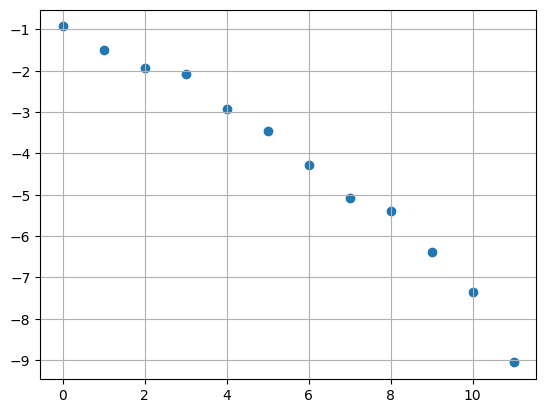

In [25]:
from matplotlib import pyplot as plt

plt.scatter(np.arange(len(theta_dot_sq_rem_expl_ratio)),np.log(theta_dot_sq_rem_expl_ratio))
plt.grid()
# for x, y in zip(np.arange(len(candid_lib_sing_values)),np.log(candid_lib_sing_values)):
#     plt.text(x,y,y)

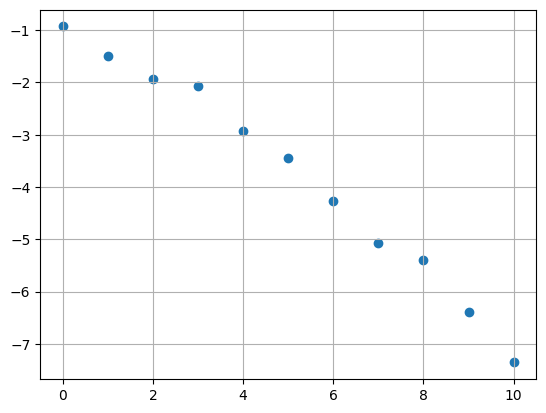

In [26]:
from matplotlib import pyplot as plt

plt.scatter(np.arange(len(theta_dot_rem_expl_ratio)),np.log(theta_dot_rem_expl_ratio))
plt.grid()
# for x, y in zip(np.arange(len(candid_lib_sing_values)),np.log(candid_lib_sing_values)):
#     plt.text(x,y,y)

### Finding the remaining algebraic relationships

In [27]:
from dae_finder import AlgModelFinder
from dae_finder import sequentialThLin, AlgModelFinder


seq_th_model = sequentialThLin(fit_intercept=True, coef_threshold= 0.1)


algebraic_model_th.fit(candidate_lib_full, scale_columns= False)

In [28]:
seq_th_model = sequentialThLin(fit_intercept=True, coef_threshold= 0.05)
algebraic_model_th = AlgModelFinder(custom_model=True, custom_model_ob= seq_th_model)

algebraic_model_th.fit(candidate_lib_full.drop(["x^2", "x d(x) /dt"], axis=1), scale_columns= False)

Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations


AlgModelFinder(custom_model=True,
               custom_model_ob=<dae_finder.sequentialThLin object at 0x1518b6a50>)

In [27]:
algebraic_model_th.best_models(5)

,d(x) /dt^2,d(y) /dt^2,d(x) /dt d(y) /dt,x y,y^2
x,1.60980207,2.43204142,3.53222112,1.76300941,0.54707199
y,-11.98150858,-7.55126878,-7.66550075,-1.95776334,0.55830838
d(x) /dt,-0.08303134,0.82841409,-0.49778813,-0.14833787,0.34449466
d(y) /dt,0.24680006,0.89787330,0.68036991,0.29070150,0.26779085
x y,-1.17338210,-1.04778029,-2.01460605,NaN,-0.10026895
x d(y) /dt,0.07903991,0.00000000,0.12588371,0.05523978,0.00000000
y^2,0.80985894,-1.74182516,0.25236588,-0.07274618,NaN
y d(x) /dt,0.12556299,0.00000000,0.00000000,0.00000000,0.00000000
y d(y) /dt,0.00000000,-0.13324336,0.00000000,0.00000000,0.00000000
d(x) /dt d(y) /dt,-0.74245844,-0.50099163,NaN,-0.36248805,0.00000000


In [28]:
#Use lasso model by default
algebraic_model_1 = AlgModelFinder(model_id='lasso', alpha=0.3, fit_intercept=True)
algebraic_model_1.fit(candidate_lib_full, scale_columns= True)


algebraic_model_1.best_models(5)

,y^2,y,x^2,d(y) /dt^2,x d(x) /dt
x,0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000
y,0.00000000,NaN,0.00000000,-0.31180928,0.00000000
d(x) /dt,0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000
d(y) /dt,0.00000000,-0.00000000,-0.00000000,0.00000000,0.00000000
x^2,-0.33406542,-0.00000000,NaN,0.00000000,0.00000000
x y,0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000
x d(x) /dt,-0.00000000,0.00000000,-0.00000000,0.00000000,NaN
x d(y) /dt,0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000
y d(x) /dt,-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000
y d(y) /dt,0.00000000,0.00000000,0.00000000,-0.00000000,-0.63999539


In [29]:
#Use lasso model by default
algebraic_model_1 = AlgModelFinder(model_id='lasso', alpha=0.3, fit_intercept=True)
algebraic_model_1.fit(candidate_lib_full.drop(["x^2", "x d(x) /dt"], axis=1), scale_columns= True)


algebraic_model_1.best_models(5)

,y,d(y) /dt^2,y^2,d(x) /dt^2,x y
x,0.00000000,0.00000000,0.00000000,-0.00000000,0.73358735
d(x) /dt,0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000
d(y) /dt,-0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000
x y,0.00000000,-0.00000000,0.00000000,-0.00000000,NaN
x d(y) /dt,-0.00000000,-0.00000000,0.00000000,0.00000000,0.00000000
y^2,0.00000000,-2.12716914,NaN,0.00000000,0.00000000
y d(x) /dt,0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000
y d(y) /dt,0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000
d(x) /dt^2,-0.03766113,0.00000000,0.00000000,NaN,-0.00000000
d(x) /dt d(y) /dt,-0.00000000,-0.00000000,0.00000000,-0.02343843,-0.09253592


In [1701]:
from sklearn.linear_model import LinearRegression

In [1702]:
model_lin = LinearRegression(fit_intercept= True)

model_lin.fit(X=candidate_lib_full[["d(y) /dt^2", "d(x) /dt^2"]], y=candidate_lib_full["y"])

LinearRegression()

In [1648]:
dict(zip(model_lin.feature_names_in_, model_lin.coef_))

{'d(y) /dt^2': -0.01906680205916776, 'd(x) /dt^2': -0.07168083261432287}

In [1555]:
model_lin.intercept_

4.509928764172942

In [1556]:
# Expected coefficient of x_dot^2 and y_dot^2 
1/(9.8*2) #1/2 * 1/g

0.0510204081632653

In [1557]:
# Expected intercept (coming from energy)
L #L

5.0

In [1558]:
model_lin = LinearRegression(fit_intercept= True)

model_lin.fit(X=candidate_lib_full[["y^2", "d(y) /dt^2"]], y=candidate_lib_full["x^2"])

LinearRegression()

In [1559]:
dict(zip(model_lin.feature_names_in_, model_lin.coef_))

{'y^2': -1.0463765110546164, 'd(y) /dt^2': -0.06560977288206346}

In [1446]:
model_lin.intercept_

22.705345248372744